In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#Create a 2D cluster of 50 points with mean: 
number_points = 50
mean1 = (20, 30) #mean_x, mean_y
cov1 = [[3, 0], [0, 20]] #s_x = 3, s_y = 20
Data1 = np.random.multivariate_normal(mean1, cov1, number_points)
#Create a 2D cluster of 50 points with mean: 
mean2 = (40, 40) #mean_x, mean_y
cov2 = [[10, 0], [0, 10]] #s_x = 10, s_y = 10
Data2 = np.random.multivariate_normal(mean2, cov2, number_points)
#Create a 2D cluster of 50 points with mean: 
mean3 = (50, 40) #mean_x, mean_y
cov3 = [[15, 0], [0, 15]] #s_x = 15, s_y = 15
Data3 = np.random.multivariate_normal(mean3, cov3, number_points)

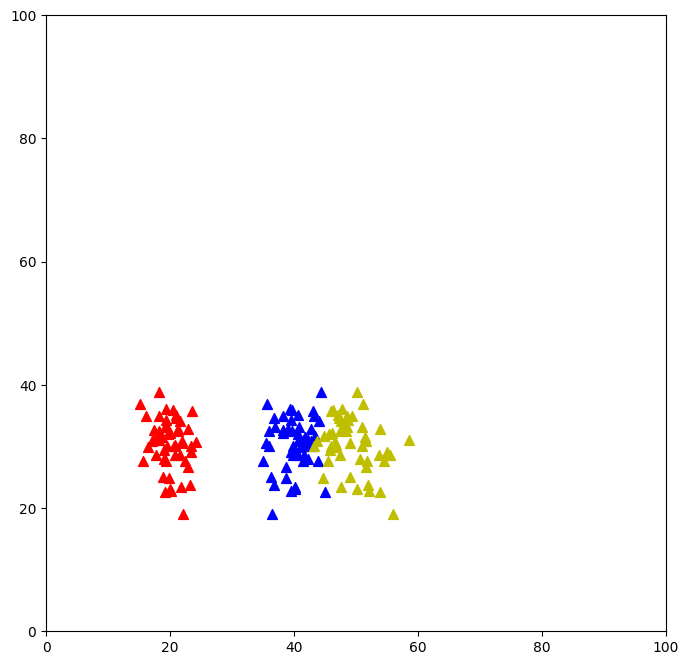

In [7]:
#matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, ...)
fig = plt.figure(figsize=(8, 8)) #8 inch by 8 inch plot size
plt.xlim(0, 100) #x min and max
plt.ylim(0, 100) #y min and max
plt.scatter(Data1[:, 0],Data1[:, 1], 50,'r','^') #size 80, red, triangle
plt.scatter(Data2[:, 0],Data1[:, 1], 50,'b','^') #size 80, blue, triangle
plt.scatter(Data3[:, 0],Data1[:, 1], 50,'y','^') #size 80, yellow, triangle
plt.show()

In [8]:
# use 70% of dataset as training data and 30% as test data
trainData = np.concatenate((Data1[0:35,:], Data2[0:35,:], Data3[0:35,:]), axis=0)
testData = np.concatenate((Data1[35:50,:], Data2[35:50,:], Data3[35:50,:]), axis=0)